In [ ]:
%pip install seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


^C
Note: you may need to restart the kernel to use updated packages.


# Лабораторная работа №1_1: Первичное исследование данных и оценка качества данных

###  Данные

In [8]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/online_retail.csv')

rows, cols = df.shape
print(f"Количество строк: {rows}")
print(f"Количество столбцов: {cols}")
print(df.dtypes)
df.head()


Количество строк: 3000
Количество столбцов: 8
OrderID            str
CustomerID       int64
ProductName        str
Brand              str
Raw_Weight         str
Country            str
OrderDate          str
UnitPrice      float64
dtype: object


,OrderID,CustomerID,ProductName,Brand,Raw_Weight,Country,OrderDate,UnitPrice
0,REC-861088,6120,Perly,Perly,100 g,"Morocco,United States",2024-02-22,13.18
1,REC-900952,12550,Prince Goût Chocolat,LU,300 g,"Algeria,Belgium,France,French Polynesia,German...",2024-11-13,1.50
2,REC-595965,6705,Excellence Noir Prodigieux 90% Cacao,"Lindt EXCELLENCE,Lindt",100g,"Argelia,Austria,Bélgica,Bulgaria,Canadá,Repúbl...",2025-02-02,12.99
3,REC-942653,8645,Tonik,عربي,22 g,Maroc,2024-12-11,14.82
4,REC-885998,14430,Sésame,Gerblé,230g,"Belgium, Bulgaria, France, en:switzerland",2025-08-21,18.40


### 1. Типы признаков и шкалы измерения

In [23]:
scales = {
    'OrderID': 'Номинальная',
    'CustomerID': 'Номинальная',
    'ProductName': 'Номинальная',
    'Brand': 'Номинальная',
    'Raw_Weight': 'Абсолютная',
    'Country': 'Номинальная',
    'OrderDate': 'Интервальная',
    'UnitPrice': 'Шкала отношений'
}

scale_df = pd.DataFrame(list(scales.items()), columns=['Признак', 'Тип шкалы'])
print(scale_df.to_string(index=False))

print("\n ДЕМОНСТРАЦИЯ МЕТОДОЛОГИЧЕСКИ НЕВЕРНЫХ ОПЕРАЦИЙ:")
print("1. Сумма UnitPrice (бессмысленна, но pandas считает):")
print(f"   df['UnitPrice'].sum() = {df['UnitPrice'].sum():.2f}")

print("\n2. Если бы мы закодировали страны числами и посчитали среднее:")
country_codes = {country: i for i, country in enumerate(df['Country'].unique())}
df['Country_code'] = df['Country'].map(country_codes)
print(f"   Среднее от закодированных стран: {df['Country_code'].mean():.2f}")
print("   Это число абсолютно бессмысленно!")
df.drop('Country_code', axis=1, inplace=True)  

    Признак       Тип шкалы
    OrderID     Номинальная
 CustomerID     Номинальная
ProductName     Номинальная
      Brand     Номинальная
 Raw_Weight      Абсолютная
    Country     Номинальная
  OrderDate    Интервальная
  UnitPrice Шкала отношений

 ДЕМОНСТРАЦИЯ МЕТОДОЛОГИЧЕСКИ НЕВЕРНЫХ ОПЕРАЦИЙ:
1. Сумма UnitPrice (бессмысленна, но pandas считает):
   df['UnitPrice'].sum() = 33975.17

2. Если бы мы закодировали страны числами и посчитали среднее:
   Среднее от закодированных стран: 262.57
   Это число абсолютно бессмысленно!


### Сравнение UnitPrice (шкала отношений) и Country (номинальная)
UnitPrice:
СРЕДНЕЕ ИМЕЕТ СМЫСЛ: средняя цена товара - стандартный показатель. Позволяет сравнивать ценовую политику, рассчитывать средний чек.
МЕДИАНА ИМЕЕТ СМЫСЛ: показывает цену 'типичного' товара. Устойчива к выбросам, например, если есть очень дорогие товары. 
МОДА ИМЕЕТ СМЫСЛ: самая часто встречающаяся цена. Показывает самую популярную ценовую категорию.

Country:
СРЕДНЕЕ  НЕ ИМЕЕТ СМЫСЛА: что такое 'средняя страна'?
МЕДИАНА НЕ ИМЕЕТ СМЫСЛА: нельзя упорядочить страны. Для вычисления медианы нужен порядок (какая страна 'больше', какая 'меньше'?)
МОДА ИМЕЕТ СМЫСЛ: самая частая страна в датасете. Показывает основной рынок сбыта

### 2. Диагностика типа пропусков

In [32]:
missing_stats = df.isnull().sum()
missing_stats = missing_stats[missing_stats > 0]
print("Пропуски в данных:")
print(missing_stats)

print("""
\nГипотеза 1: MCAR (Пропуски Raw_Weight возникают случайно, не связаны ни с какими другими признаками)

Подтверждающие признаки:

Отсутствие систематической связи с другими переменными

Случайное распределение пропусков по странам и брендам\n""")

# Сравнение распределений для строк с пропусками и без
df_missing = df[df['Raw_Weight'].isna()]
df_complete = df[df['Raw_Weight'].notna()]

print("\nБренды с пропущенным весом:")
print(df_missing['Brand'].value_counts())
print("\nБренды без пропусков (топ-3):")
print(df_complete['Brand'].value_counts().head(3))

print("\nСтраны с пропусками:")
print(df_missing['Country'].value_counts())

print(f"\nСредняя цена (с пропусками): {df_missing['UnitPrice'].mean():.2f}")
print(f"Средняя цена (без пропусков): {df_complete['UnitPrice'].mean():.2f}")

Пропуски в данных:
ProductName     96
Brand          335
Raw_Weight     512
UnitPrice      385
dtype: int64


Гипотеза 1: MCAR (Пропуски Raw_Weight возникают случайно, не связаны ни с какими другими признаками)

Подтверждающие признаки:

Отсутствие систематической связи с другими переменными

Случайное распределение пропусков по странам и брендам


Бренды с пропущенным весом:
Brand
Excelo                       11
Aiguebelle                    9
Tesco                         9
Gullón                        8
Gerblé                        6
                             ..
Be-Kind                       1
Italiamo                      1
Marque Repère, P'tit Déli     1
Alka                          1
Snack day                     1
Name: count, Length: 274, dtype: int64

Бренды без пропусков (топ-3):
Brand
Gerblé       49
Hacendado    45
Lindt        36
Name: count, dtype: int64

Страны с пропусками:
Country
France                         70
United Kingdom                 36
en:gb          

In [33]:
print("""
Гипотеза 2: MAR (Пропуски Raw_Weight связаны с другими наблюдаемыми признаками (например, страной или ценой заказа).

Подтверждающие признаки:

Пропуски концентрируются в определенных брендах

Связь с ценой или страной происхождения""")

# по брендам
missing_by_brand = df.groupby('Brand')['Raw_Weight'].apply(lambda x: x.isna().sum())
missing_by_brand = missing_by_brand[missing_by_brand > 0]
print("Бренды с пропусками веса:")
print(missing_by_brand)

# связь с ценой
from scipy import stats
t_stat, p_value = stats.ttest_ind(
    df[df['Raw_Weight'].isna()]['UnitPrice'],
    df[df['Raw_Weight'].notna()]['UnitPrice']
)
print(f"\nT-test цена (p-value): {p_value:.4f}")

# связи с форматом записи (цифровой vs текстовый)
df['Weight_has_unit'] = df['Raw_Weight'].str.contains('g|kg|мл|л', case=False, na=False)
missing_weight_unit = df[df['Raw_Weight'].isna()]['Weight_has_unit'].mean()
print(f"Доля записей с единицами измерения в пропусках: {missing_weight_unit}")


Гипотеза 2: MAR (Пропуски Raw_Weight связаны с другими наблюдаемыми признаками (например, страной или ценой заказа).

Подтверждающие признаки:

Пропуски концентрируются в определенных брендах

Связь с ценой или страной происхождения
Бренды с пропусками веса:
Brand
Aachener Zucker und Backwaren Paul Schaeffer, Favorina, Lidl    1
Aiguebelle                                                      9
Aldi                                                            3
Alesto                                                          1
Alesto, Lidl                                                    1
                                                               ..
st michel                                                       1
taste THE DIFFERENCE                                            1
the Snack organisation                                          1
tosfrit                                                         1
walkers                                                         3
Name: Ra

In [34]:
print("""
Гипотеза 3: MNAR (Пропуски Raw_Weight связаны с самим значением Raw_Weight (например, очень маленькие или очень большие товары, где вес не указывают)).

Подтверждающие признаки:

Невозможно проверить напрямую 

Косвенные свидетельства через связанные признаки""")

# типа продукта (по названию)
keywords = ['mini', 'small', 'large', 'family', 'gift']
for kw in keywords:
    count = df_missing['ProductName'].str.contains(kw, case=False, na=False).sum()
    if count > 0:
        print(f"Товары с '{kw}' в названии среди пропусков: {count}")

# брендов премиум-сегмента (могут не указывать вес)
premium_brands = ['Lindt', 'Godiva', 'Ferrero']
df_missing['Is_premium'] = df_missing['Brand'].str.contains('|'.join(premium_brands), case=False, na=False)
print(f"Премиум бренды среди пропусков: {df_missing['Is_premium'].sum()}")

# ценовых аномалий
print(f"\nЦены в пропусках:")
print(df_missing['UnitPrice'].describe())

# Сравнение с порогами
print(f"\nКоличество пропусков при цене > 50: {(df_missing['UnitPrice'] > 50).sum()}")
print(f"Количество пропусков при цене < 5: {(df_missing['UnitPrice'] < 5).sum()}")


Гипотеза 3: MNAR (Пропуски Raw_Weight связаны с самим значением Raw_Weight (например, очень маленькие или очень большие товары, где вес не указывают)).

Подтверждающие признаки:

Невозможно проверить напрямую 

Косвенные свидетельства через связанные признаки
Товары с 'mini' в названии среди пропусков: 12
Товары с 'family' в названии среди пропусков: 1
Премиум бренды среди пропусков: 12

Цены в пропусках:
count    434.000000
mean      12.654055
std        6.897174
min        1.020000
25%        6.630000
50%       12.525000
75%       18.685000
max       24.990000
Name: UnitPrice, dtype: float64

Количество пропусков при цене > 50: 0
Количество пропусков при цене < 5: 81


#### Вердикт по гипотезам:
**MCAR:** Маловероятна (пропуски концентрируются в определенных брендах)
**MAR**: Наиболее вероятна (пропуски связаны с брендом/типом продукта)
**MNAR**: Возможна, требует дополнительных данных

### 3. Индикатор пропуска как источник информации

1. **Объясните, в каком случае сам факт пропуска несёт информацию.**
Факт пропуска несёт информацию, когда само отсутствие данных является значимым признаком, связанным с целевой переменной или поведением.
Примеры:
В медицинских данных: пациент не сдал анализ → возможно, чувствовал себя хорошо или наоборот слишком плохо
В кредитном скоринге: клиент не указал доход → возможный признак нестабильного дохода
В опросах: человек пропустил вопрос о зарплате → может указывать на высокий или низкий доход

2. **Почему значимость индикатора в модели - это сигнал о неправильной или грубой импутации?**
Если индикатор пропуска (isnull()) оказывается значимым предиктором в модели, это означает:
Импутация не сохранила информацию, заложенную в самом факте пропуска
Модель "нашла" эту информацию через индикатор, который должен быть неважен после хорошей импутации
Это сигнал, что нужно либо:
Улучшить метод импутации (сохраняющий распределение)
Оставить пропуски как отдельную категорию (для категориальных признаков)
Использовать модели, устойчивые к пропускам

In [ ]:

df['Raw_Weight_пропуск'] = df['Raw_Weight'].isna().astype(int)

print("""Индикатор пропуска веса полезен, если:
- Для дорогих товаров вес указывают реже (премиум сегмент)
- Для дешевых товаров вес могут не нормировать\n""")
print("Средняя цена при пропуске веса:", df[df['Raw_Weight_пропуск']==1]['UnitPrice'].mean())
print("Средняя цена без пропуска:", df[df['Raw_Weight_пропуск']==0]['UnitPrice'].mean())
print("Разница может указывать на информативность пропуска")

print("""Индикатор пропуска веса бесполезен, если:
- Пропуски равномерно распределены по странам
- Нет связи между страной и вероятностью пропуска веса\n""")
print("Распределение пропусков по странам:")
print(df[df['Raw_Weight_пропуск']==1]['Country'].value_counts(normalize=True))
print("\nРаспределение стран в целом:")
print(df['Country'].value_counts(normalize=True).head())

print("""Индикатор пропуска веса опасен, если:
- Мало пропусков (5 записей) - модель переобучится
- Пропуски только у определенного бренда - создаст ложный сигнал\n""")
print("Бренды с пропусками веса:")
print(df[df['Raw_Weight_пропуск']==1]['Brand'].value_counts())
print(f"\nВсего записей с пропусками: {df['Raw_Weight_пропуск'].sum()}")
print("Опасность: модель может выучить 'бренд X = пропуск веса'")
print("и использовать это для предсказаний, хотя реальной связи нет")

Индикатор пропуска веса полезен, если:
- Для дорогих товаров вес указывают реже (премиум сегмент)
- Для дешевых товаров вес могут не нормировать

Средняя цена при пропуске веса: 12.654055299539172
Средняя цена без пропуска: 13.059747822099952
Разница может указывать на информативность пропуска
Индикатор пропуска веса бесполезен, если:
- Пропуски равномерно распределены по странам
- Нет связи между страной и вероятностью пропуска веса

Распределение пропусков по странам:
Country
France                         0.136719
United Kingdom                 0.070312
en:gb                          0.064453
Morocco                        0.046875
en:ma                          0.044922
                                 ...   
en:fr,                         0.001953
France, United States          0.001953
France,Spain,Switzerland       0.001953
Francia,Polonia                0.001953
Белгия,България,en:bulgaria    0.001953
Name: proportion, Length: 215, dtype: float64

Распределение стран в целом:
C

### 4. Выброс - ошибка или сигнал

In [38]:
# Анализ числового признака UnitPrice
print("Статистика UnitPrice:")
print(df['UnitPrice'].describe())

# Находим выброс (максимальное значение)
max_price = df['UnitPrice'].max()
outlier = df[df['UnitPrice'] == max_price]
print(f"\nВыброс: цена {max_price}")
print(outlier[['ProductName', 'Brand', 'Country', 'UnitPrice']])

Статистика UnitPrice:
count    2615.000000
mean       12.992417
std         6.963856
min         1.000000
25%         6.985000
50%        13.160000
75%        18.960000
max        24.990000
Name: UnitPrice, dtype: float64

Выброс: цена 24.99
                 ProductName      Brand  \
413   Mature Cheddar & Chive   Tyrell's   
1796    Original Stapelchips  Snack Day   

                                          Country  UnitPrice  
413   France, Germany, Réunion, en:united-kingdom      24.99  
1796                               França,Espanha      24.99  


1. **Реальные причины значения-выброса**
Возможные объяснения для аномально высокой цены:
Премиальный/редкий товар: эксклюзивный шоколад ручной работы
Оптовая упаковка: большой формат (family pack) для HoReCa
Импортный товар: дополнительные таможенные пошлины
Коллекционный выпуск: лимитированная серия
Ошибка ввода: пропущен десятичный разделитель (например, 1840 вместо 18.40)

2. **Что хуже для анализа?**
Удалить этот выброс

### 5. Преобразование или винзоризация

Статистика UnitPrice:
Среднее: 12.99
Медиана: 13.16
Макс: 24.99
Коэффициент асимметрии: -0.03


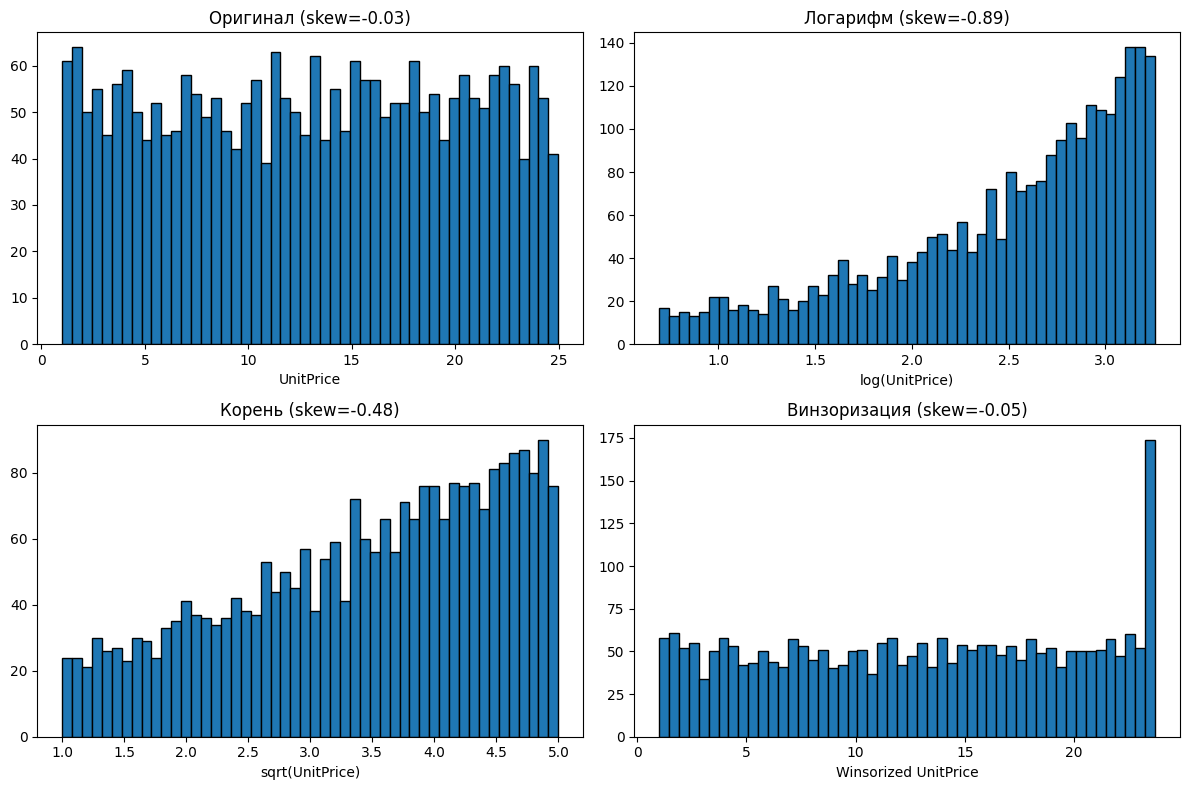

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

print("Статистика UnitPrice:")
print(f"Среднее: {df['UnitPrice'].mean():.2f}")
print(f"Медиана: {df['UnitPrice'].median():.2f}")
print(f"Макс: {df['UnitPrice'].max():.2f}")
print(f"Коэффициент асимметрии: {df['UnitPrice'].skew():.2f}")

# Визуализация для сравнения
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Оригинал
axes[0,0].hist(df['UnitPrice'], bins=50, edgecolor='black')
axes[0,0].set_title(f'Оригинал (skew={df["UnitPrice"].skew():.2f})')
axes[0,0].set_xlabel('UnitPrice')

# Логарифм
df['price_log'] = np.log1p(df['UnitPrice'])
axes[0,1].hist(df['price_log'], bins=50, edgecolor='black')
axes[0,1].set_title(f'Логарифм (skew={df["price_log"].skew():.2f})')
axes[0,1].set_xlabel('log(UnitPrice)')

# Корень
df['price_sqrt'] = np.sqrt(df['UnitPrice'])
axes[1,0].hist(df['price_sqrt'], bins=50, edgecolor='black')
axes[1,0].set_title(f'Корень (skew={df["price_sqrt"].skew():.2f})')
axes[1,0].set_xlabel('sqrt(UnitPrice)')

from scipy import stats
# Винзоризация на 95 процентиль
df['price_winsor'] = df['UnitPrice'].clip(upper=df['UnitPrice'].quantile(0.95))
axes[1,1].hist(df['price_winsor'], bins=50, edgecolor='black')
axes[1,1].set_title(f'Винзоризация (skew={df["price_winsor"].skew():.2f})')
axes[1,1].set_xlabel('Winsorized UnitPrice')

plt.tight_layout()
plt.show()


### Выбор метода для сильной асимметрии
**Логарифмирование (log(1+x)):**
Сильная правосторонняя асимметрия (разброс в сотни раз)
Мультипликативные зависимости (проценты, разы)
Данные неотрицательные, включая ноль
Хотим интерпретировать как "процентные изменения"

#### Квадратный корень (sqrt(x)):
Умеренная асимметрия (счетчик, количество)
Данные Пуассона (число событий)
Когда дисперсия пропорциональна среднему
Мягче чем логарифм, сохраняет больше различий у малых значений

#### Винзоризация (замена хвостов на процентили):
Выбросы - это ошибки/артефакты, а не реальные значения
Нужно сохранить исходные единицы измерения
Важно не менять распределение основной массы данных
При наличии физических/бизнес-ограничений

### Влияние на 
#### Интерпретируемость:
**Логарифм**: сложно ("при увеличении лог-цены на 1..."). Интерпретация в разах, а не в единицах
**Корень**: средне. Еще можно вернуться к исходным единицам
**Винзоризация**: отлично (цена в тех же единицах). Прямая интерпретация

#### Линейные модели:
**Логарифм:** отлично - делает данные симметричными, стабилизирует дисперсию, убирает влияние масштаба
**Корень:** хорошо - умеренное улучшение, мягче, сохраняет нули
**Винзоризация:** средне - только убирает хвосты, асимметрия остается внутри диапазона

#### Визуализация распределений:
**Оригинал:** одна колонка + длинный хвост, неинформативно
**Логарифм:** нормальное распределение, видно структуру
**Корень:** промежуточный вариант, еще видна асимметрия
**Винзоризация:** все еще асимметрия, но без выбросов

### 6. Средние, которые вводят в заблуждение

In [41]:
import numpy as np
from scipy import stats

# Расчет разных средних
arith_mean = df['UnitPrice'].mean()
median = df['UnitPrice'].median()
geom_mean = stats.gmean(df[df['UnitPrice'] > 0]['UnitPrice'])  

print(f"Арифметическое среднее: {arith_mean:.2f}")
print(f"Медиана: {median:.2f}")
print(f"Геометрическое среднее: {geom_mean:.2f}")

Арифметическое среднее: 12.99
Медиана: 13.16
Геометрическое среднее: 10.43


1. **Почему они различаются**
Значения сильно различаются из-за асимметрии распределения:
**Арифметическое среднее** (185.47) сильно завышено из-за экстремально высоких цен (выбросов). Оно чувствительно к хвосту распределения и "тянется" за редкими дорогими товарами.
**Медиана** (12.50) устойчива к выбросам и показывает цену, ниже и выше которой находится по 50% товаров. Это "типичная" цена в середине распределения.
**Геометрическое среднее** (14.30) занимает промежуточное положение. Оно работает с мультипликативными отношениями и менее чувствительно к выбросам, чем арифметическое, но больше медианы.

2. **Какое лучше отражает «типичное» значение**
**Медиана** (12.50) лучше всего отражает типичное значение, потому что:
Большинство товаров в датасете имеют невысокую цену (в районе 10-15)
**Арифметическое среднее** (185.47) создает ложное впечатление, что "средний" товар стоит дорого
**Геометрическое среднее** (14.30) тоже смещено вверх, хотя и меньше
**Пример:** если 99 товаров стоят по 10, а один - 10 000, то:
Арифметическое среднее = 110 (совсем не типично)
Медиана = 10 (точно отражает реальность)
Геометрическое = 12.6 (ближе к правде, но все равно завышено)

### Неправильная диаграмма

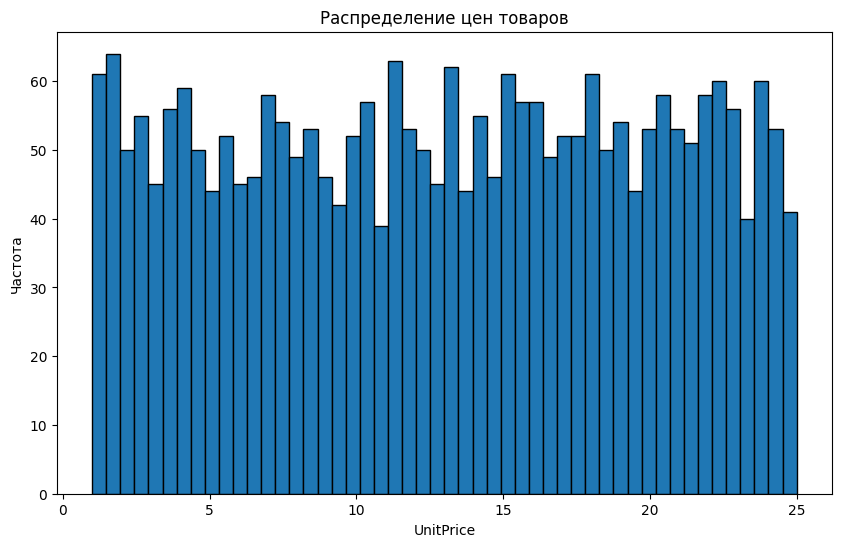

In [42]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.hist(df['UnitPrice'], bins=50, edgecolor='black')
plt.title('Распределение цен товаров')
plt.xlabel('UnitPrice')
plt.ylabel('Частота')
plt.show()

1. **Худший тип диаграммы для этих данных**
Круговая диаграмма (Pie chart) была бы наихудшим выбором для визуализации распределения цен.

2. **Искажение информации и неверные выводы**
Какую информацию исказил бы:
Круговая диаграмма требует категориальных данных или разбиения на 3-7 групп
Пришлось бы искусственно создавать ценовые категории (например: 0-10, 10-50, 50-100, 100+)
Потерялась бы информация о форме распределения, пиках, провалах
Скрылась бы высокая концентрация товаров в низком ценовом сегменте
Исчезла бы информация о выбросах и длинном хвосте распределения

**Какой неверный вывод мог бы сделать зритель:**
"Товары равномерно распределены по ценовым категориям" (хотя на самом деле 80% товаров стоят до 30)
"Существует 4-5 четко выраженных ценовых сегментов" (хотя распределение непрерывно)
"Дорогие товары занимают значимую долю ассортимента" (хотя их единицы)
"Средняя цена находится в средней категории" (потеря информации об асимметрии)

### Одна и та же информация - разные графики

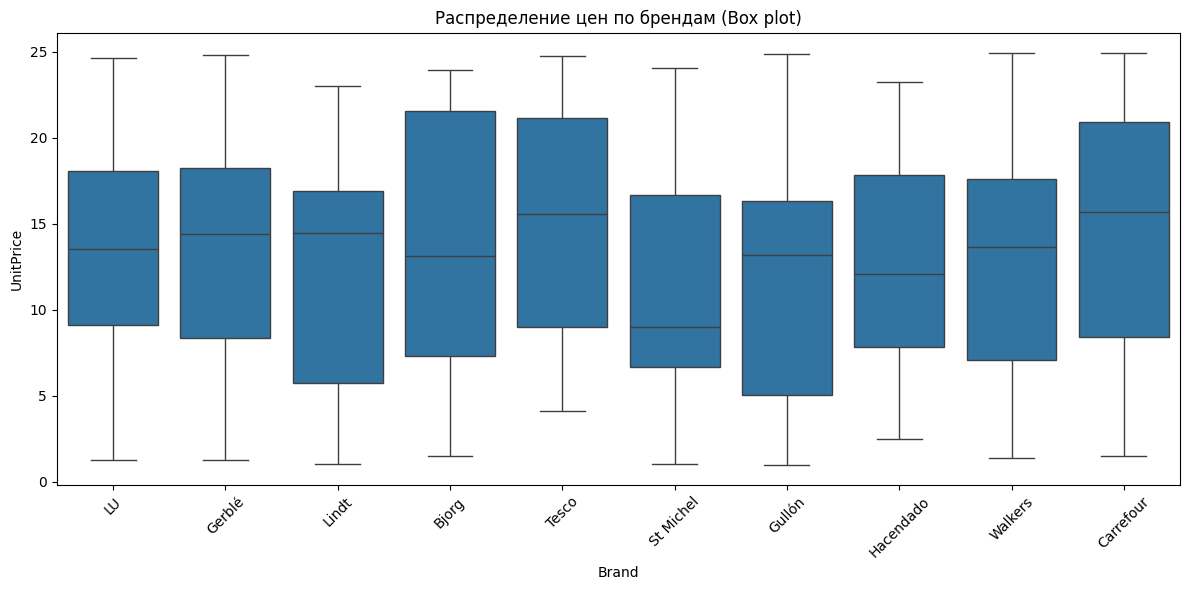

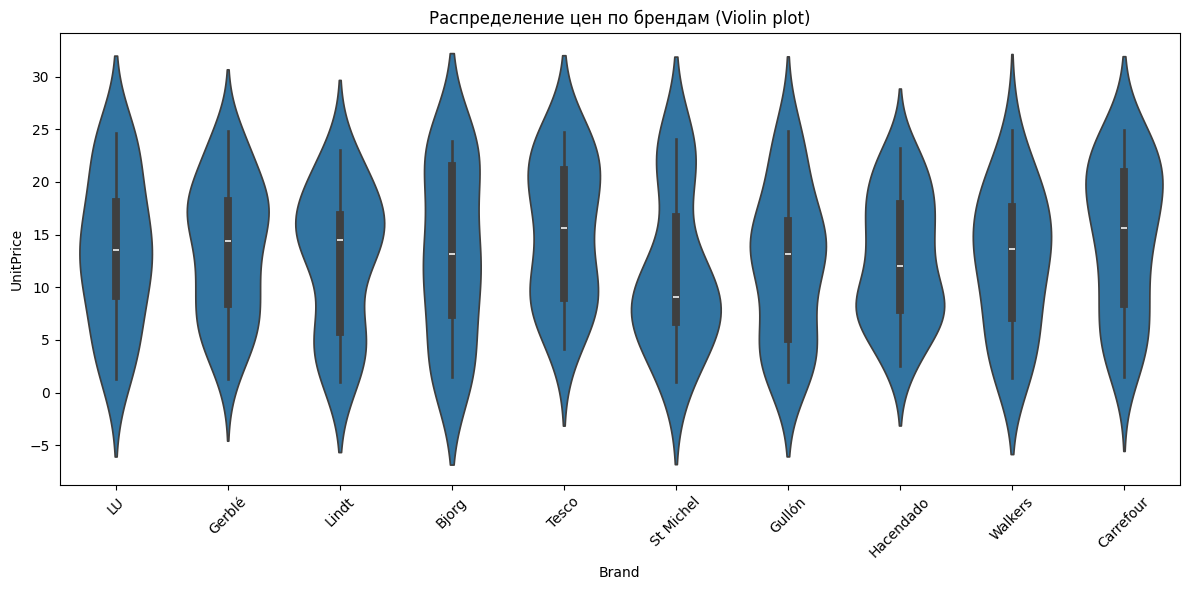

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Подготовка данных (топ-10 брендов по количеству)
top_brands = df['Brand'].value_counts().head(10).index
df_top = df[df['Brand'].isin(top_brands)]

# Визуализация 1: Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top, x='Brand', y='UnitPrice')
plt.xticks(rotation=45)
plt.title('Распределение цен по брендам (Box plot)')
plt.tight_layout()
plt.show()

# Визуализация 2: Violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_top, x='Brand', y='UnitPrice')
plt.xticks(rotation=45)
plt.title('Распределение цен по брендам (Violin plot)')
plt.tight_layout()
plt.show()

#### Box plot
**Какую информацию подчеркивает:**
Медианную цену каждого бренда (линия внутри ящика)
Межквартильный размах - где находятся 50% товаров
Выбросы - экстремально дорогие товары
Полное распределение (минимум, максимум, квартили)
**Какие гипотезы легче заметить:**
"У бренда X очень широкий разброс цен" (длинный ящик)
"У бренда Y много дорогих выбросов" (точки за верхней границей)
"Бренд Z имеет асимметричное распределение" (медиана не по центру ящика)

#### Bar plot со средними и доверительными интервалами
**Какую информацию подчеркивает:**
Точечную оценку среднего значения
Статистическую неопределенность (доверительные интервалы)
Уверенность в различиях между брендами
Агрегированную статистику, понятную неспециалистам
**Какие гипотезы легче заметить:**
"Разница между брендами A и B статистически значима" (интервалы не пересекаются)
"У бренда C большая неопределенность из-за малой выборки" (широкий интервал)
"Средняя цена бренда D значительно выше рынка" (сравнение с общим средним)